In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime
%config InlineBackend.figure_formats = ['svg']
plt.style.use("seaborn-whitegrid")

C:\Users\duanf\AppData\Local\Temp\ipykernel_137044\1035864669.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [14]:
df = sns.load_dataset("titanic")

In [15]:
df_interval1 = pd.read_csv("./btc_data/reg_interval1.csv")
df_interval2 = pd.read_csv("./btc_data/reg_interval2.csv")
df_interval3 = pd.read_csv("./btc_data/reg_interval3.csv")

In [16]:
price = df_interval1["priceUSD"].tolist() + df_interval2["priceUSD"].tolist() + df_interval3["priceUSD"].tolist()
classes = ["interval1" for _ in range(len(df_interval1))] +  ["interval2" for _ in range(len(df_interval2))] +  ["interval3" for _ in range(len(df_interval3))]

<Axes: xlabel='price', ylabel='interval'>

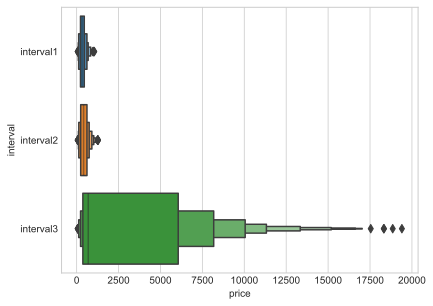

In [17]:
sns.boxenplot(data = pd.DataFrame({"price" : price,"interval":classes}),
              x    = "price" ,
              y    = "interval")

In [18]:
raw = pd.read_csv("btc_data/BTC_DATA.csv")

Text(0, 0.5, 'BTC Price/USD')

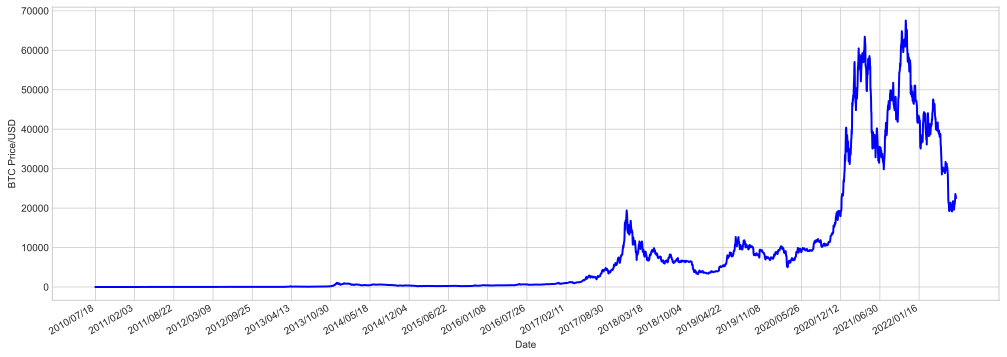

In [19]:
plt.figure(figsize = (17,6))
times = [datetime.strptime(d, '%Y/%m/%d').date() if isinstance(d,str) else d  for d in raw["Date"].tolist()]
plt.plot(times,
         raw["priceUSD"],color="blue",lw=2)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

plt.xticks(times[::200])
plt.gcf().autofmt_xdate()

plt.xlabel("Date")
plt.ylabel("BTC Price/USD")

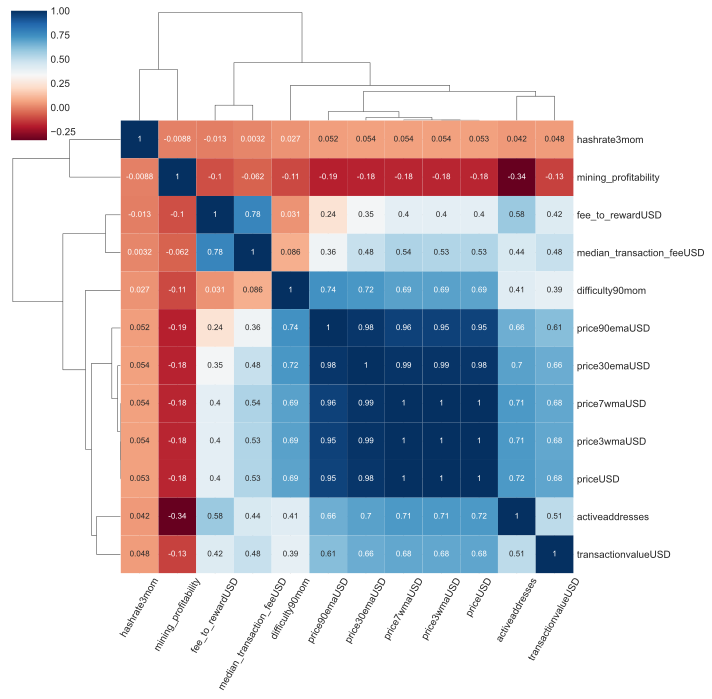

In [20]:
g = sns.clustermap(df_interval3.corr(), 
                   method = 'complete', 
                   cmap   = 'RdBu', 
                   annot  = True, 
                   annot_kws = {'size': 8})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

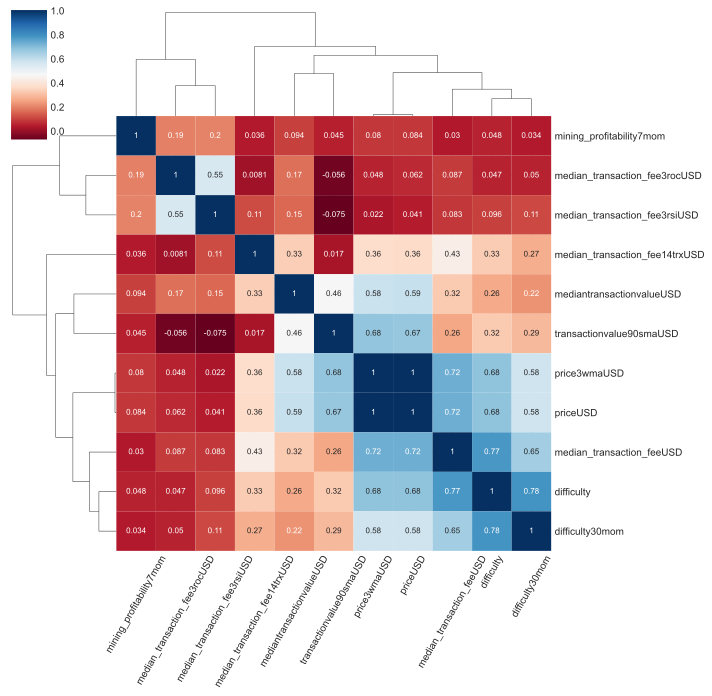

In [21]:
g = sns.clustermap(df_interval2.corr(), 
                   method = 'complete', 
                   cmap   = 'RdBu', 
                   annot  = True, 
                   annot_kws = {'size': 8})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

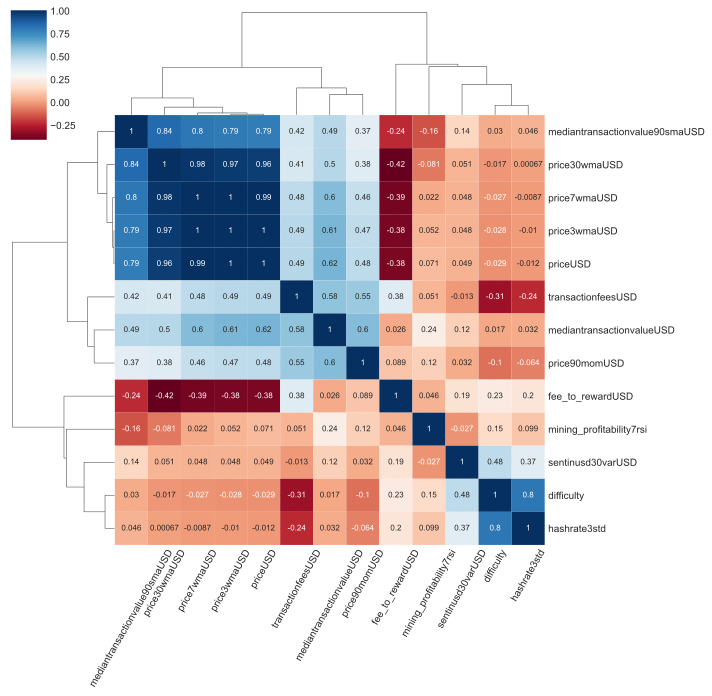

In [22]:
g = sns.clustermap(df_interval1.corr(), 
                   method = 'complete', 
                   cmap   = 'RdBu', 
                   annot  = True, 
                   annot_kws = {'size': 8})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

In [ ]:
sns.pairplot(df_interval1)

In [25]:
df_reg = pd.read_csv("./result_interval_regression.csv")
df_reg

,r2,mae,mse,mape,interval,model_name
0,0.992185,7.581018,293.144219,0.019674,interval1,tcn
1,0.995378,6.729362,173.355157,0.020297,interval1,cnn
2,0.996627,5.299999,126.501860,0.014819,interval1,bilstm
3,0.997481,5.600003,94.497679,0.015719,interval1,ann
4,0.988471,9.258568,432.419389,0.024257,interval1,transformer
5,0.996037,7.147657,246.380559,0.027570,interval2,tcn
6,0.997486,7.212429,156.274593,0.025098,interval2,cnn
7,0.997509,6.098374,154.865110,0.021763,interval2,bilstm
8,0.993701,8.452154,391.644953,0.045549,interval2,ann
9,0.997921,6.935332,129.278951,0.020852,interval2,transformer


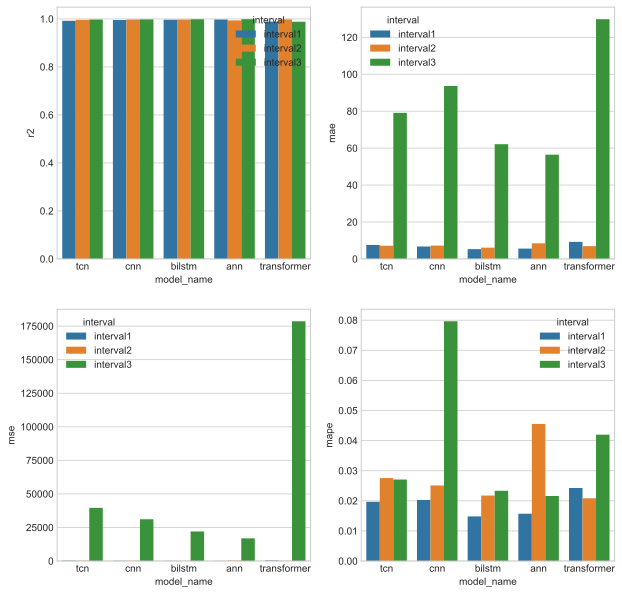

In [29]:
fig,axs = plt.subplots(2,2,figsize=(10,10))
axs = axs.flatten()
for i,k in enumerate( ["r2","mae","mse","mape"] ):
    sns.barplot(
        data = df_reg,
        x  = "model_name",
        y  = k,
        hue= "interval",
        ax = axs[i]
    )

In [30]:
df_reg = pd.read_csv("./result_future_regression.csv")
df_reg

,r2,mae,mse,mape,window_size,model_name
0,0.988320,126.432985,144577.188936,3.187856,seven,tcn
1,0.990262,139.710541,120529.834262,0.142560,seven,cnn
2,0.990821,128.275802,113614.222739,0.595204,seven,bilstm
3,0.982609,166.728885,215260.845308,0.557717,seven,ann
4,0.975245,152.558442,306409.683966,2.838750,seven,transformer
5,0.996830,84.213541,33033.715645,0.053652,thirty,tcn
6,0.996571,95.902373,35739.141116,0.042027,thirty,cnn
7,0.995084,99.353325,51232.207963,0.040449,thirty,bilstm
8,0.984772,184.013018,158703.825006,0.067265,thirty,ann
9,0.993317,137.156430,69650.797961,0.080734,thirty,transformer


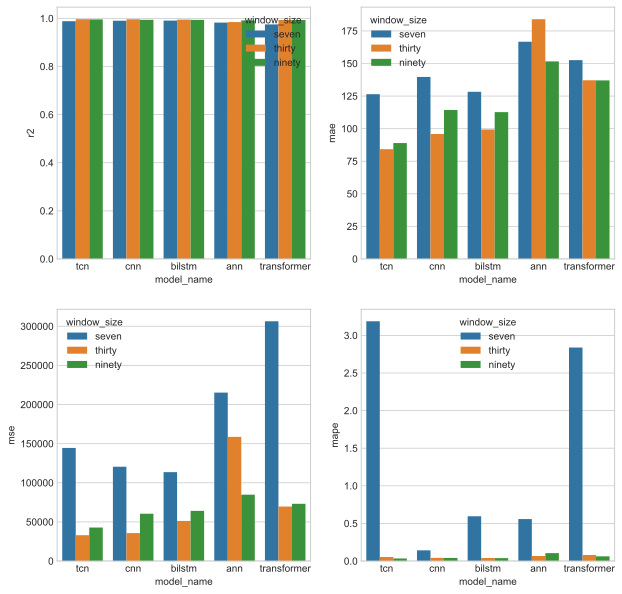

In [32]:
fig,axs = plt.subplots(2,2,figsize=(10,10))
axs = axs.flatten()
for i,k in enumerate( ["r2","mae","mse","mape"] ):
    sns.barplot(
        data = df_reg,
        x  = "model_name",
        y  = k,
        hue= "window_size",
        ax = axs[i]
    )

In [33]:
df_cls = pd.read_csv("./result_interval_classification.csv")
df_cls.head()

,accuracy,f1,roc_auc,precision,interval,model_name
0,0.545455,0.568966,0.553623,0.503817,interval1,tcn
1,0.536364,0.548673,0.542225,0.496000,interval1,cnn
2,0.531818,0.569038,0.542516,0.492754,interval1,bilstm
3,0.590909,0.579439,0.592645,0.548673,interval1,ann
4,0.540909,0.555066,0.547175,0.500000,interval1,transformer


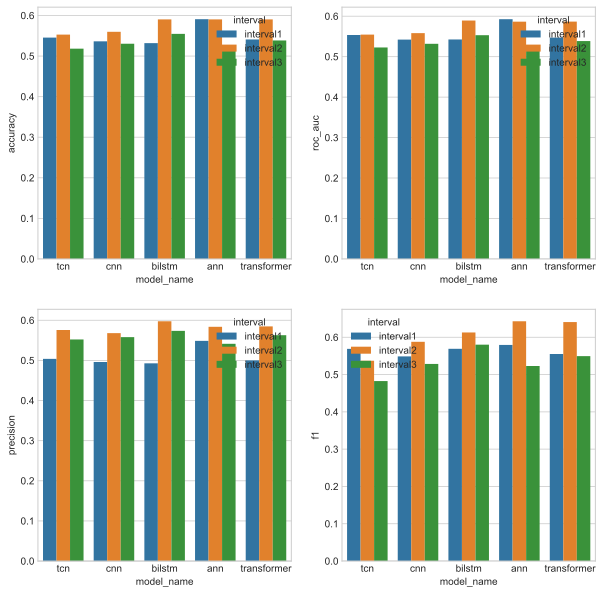

In [35]:
fig,axs = plt.subplots(2,2,figsize=(10,10))
axs = axs.flatten()
for i,k in enumerate( ["accuracy","roc_auc","precision","f1"] ):
    sns.barplot(
        data = df_cls,
        x  = "model_name",
        y  = k,
        hue= "interval",
        ax = axs[i]
    )

In [ ]:
df_cls = pd.read_csv("./result_future_classification.csv")
fig,axs = plt.subplots(2,2,figsize=(10,10))
axs = axs.flatten()
for i,k in enumerate( ["accuracy","roc_auc","precision","f1"] ):
    sns.barplot(
        data = df_cls,
        x  = "model_name",
        y  = k,
        hue= "window_size",
        ax = axs[i]
    )